## Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
Occupations
* Step 1. Import the necessary libraries
* Step 2. Import the dataset from this address.
* Step 3. Assign it to a variable called users
* Step 4. Discover what is the mean age per occupation
* Step 5. Discover the Male ratio per occupation and sort it from the most to the least
* Step 6. For each occupation, calculate the minimum and maximum ages
* Step 7. For each combination of occupation and sex, calculate the mean age
* Step 8. For each occupation present the percentage of women and men

In [2]:
import io
import urllib.request
import numpy as np
import csv
import pandas as pd
from functools import reduce

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

response = urllib.request.urlopen(url).read().decode('utf-8')
df = pd.read_csv(io.StringIO(response), delimiter="|")

byOccupation = df.groupby(['occupation'])

In [3]:
print("Step:4 Mean Age by Occupation")
print(byOccupation['age'].mean())

Step:4 Mean Age by Occupation
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [4]:
print("Step:5 Male Ratio Per Occupation")
def getRatio(series):
    return (series['M']/(series['All'])) * 100
data2 = pd.pivot_table(df,
                       index=['occupation'],
                       columns=['gender'],
                       aggfunc=len,
                       fill_value=0,
                       margins=True
                       )
data3 = data2['user_id'].assign(maleRatio=getRatio)
print(data3)

Step:5 Male Ratio Per Occupation
gender           F    M  All   maleRatio
occupation                              
administrator   36   43   79   54.430380
artist          13   15   28   53.571429
doctor           0    7    7  100.000000
educator        26   69   95   72.631579
engineer         2   65   67   97.014925
entertainment    2   16   18   88.888889
executive        3   29   32   90.625000
healthcare      11    5   16   31.250000
homemaker        6    1    7   14.285714
lawyer           2   10   12   83.333333
librarian       29   22   51   43.137255
marketing       10   16   26   61.538462
none             4    5    9   55.555556
other           36   69  105   65.714286
programmer       6   60   66   90.909091
retired          1   13   14   92.857143
salesman         3    9   12   75.000000
scientist        3   28   31   90.322581
student         60  136  196   69.387755
technician       1   26   27   96.296296
writer          19   26   45   57.777778
All            273  670 

In [5]:
print("Step:6 Min and Max ages")
dfAgesByOccupation = byOccupation['age']
print("Max Age")
print(dfAgesByOccupation.max())
print("Min Age")
print(dfAgesByOccupation.min())

Step:6 Min and Max ages
Max Age
occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64
Min Age
occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64


In [6]:
print("Step:7 Mean Age by Occupation and Sex")
print(df.groupby(['occupation','gender'])['age'].mean())

Step:7 By Occupation and Sex Mean Age
occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.02

In [8]:
print("Step:8 Percentage of Women and men")
byOccupationGenderCount = df.groupby(['occupation', 'gender']).agg({'gender': 'count'})
percentage = byOccupationGenderCount.div(byOccupation.count(), level = "occupation") * 100
print(percentage['gender'])

Step:8 Percentage of Women and men
occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
       

## Question 2
Euro Teams
* Step 1. Import the necessary libraries
* Step 2. Import the dataset from this address
* Step 3. Assign it to a variable called euro12
* Step 4. Select only the Goal column
* Step 5. How many team participated in the Euro2012?
* Step 6. What is the number of columns in the dataset?
* Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
* Step 8. Sort the teams by Red Cards, then to Yellow Cards
* Step 9. Calculate the mean Yellow Cards given per Team
* Step 10. Filter teams that scored more than 6 goals
* Step 11. Select the teams that start with G
* Step 12. Select the first 7 columns
* Step 13. Select all columns except the last 3
* Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [9]:
import io
import urllib.request
import numpy as np
import csv
import pandas as pd
from functools import reduce

url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

print('Step:4 Select only the Goal column')
euro12 = pd.read_csv(url, sep=',')
print(euro12['Goals'])

Step:4 Select only the Goal column
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [10]:
print('Step:5 How many team participated in the Euro2012?')
print(euro12.shape[0])

Step:5 How many team participated in the Euro2012?
16


In [11]:
print('Step 6. What is the number of columns in the dataset?')
print(len(euro12.columns))

Step 6. What is the number of columns in the dataset?
35


In [12]:
print('Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline')
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [13]:
print('Step 8. Sort the teams by Red Cards, then to Yellow Cards')
srted = discipline.sort_values(['Red Cards', 'Yellow Cards'])
print(srted)

Step 8. Sort the teams by Red Cards, then to Yellow Cards
                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


In [14]:
print('Step 9. Calculate the mean Yellow Cards given per Team')
print(discipline['Yellow Cards'].mean())

Step 9. Calculate the mean Yellow Cards given per Team
7.4375


In [15]:
print('Step 10. Filter teams that scored more than 6 goals')
print(euro12[euro12['Goals'] > 6])

Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G
       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0 

In [16]:
print('Step 11. Select the teams that start with G')
print(euro12[euro12['Team'].str.startswith('G')])

Step 11. Select the teams that start with G
      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6   

In [17]:
print('Step 12. Select the first 7 columns')
print(euro12.iloc[: , 0:7])

Step 12. Select the first 7 columns
                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31  

In [18]:
print('Step 13. Select all columns except the last 3')
print(euro12.iloc[: , :-3])

Step 13. Select all columns except the last 3
                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9          

In [19]:
print('Step 14. Present only the Shooting Accuracy from England, Italy and Russia')
teams = ['England', 'Italy', 'Russia']
cols = ['Team','Shooting Accuracy']
print(euro12.loc[euro12['Team'].isin(teams), cols])

Step 14. Present only the Shooting Accuracy from England, Italy and Russia
       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


## Question 3
Housing
* Step 1. Import the necessary libraries
* Step 2. Create 3 differents Series, each of length 100, as follows:
* • The first a random number from 1 to 4
* • The second a random number from 1 to 3
* • The third a random number from 10,000 to 30,000
* Step 3. Create a DataFrame by joinning the Series by column
* Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
* Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
* Step 6. Ops it seems it is going only until index 99. Is it true?
* Step 7. Reindex the DataFrame so it goes from 0 to 299

In [20]:
import io
import urllib.request
import numpy as np
import csv
import pandas as pd
from functools import reduce

print('Step 2. Create 3 differents Series, each of length 100')
series1 = pd.Series(np.random.randint(1, high=5, size=100))
series2 = pd.Series(np.random.randint(1, high=4, size=100))
series3 = pd.Series(np.random.randint(10000, high=30001, size=100))

print(series1, series2, series3)

Step 2. Create 3 differents Series, each of length 100
0     1
1     3
2     2
3     1
4     4
     ..
95    2
96    4
97    4
98    2
99    4
Length: 100, dtype: int32 0     2
1     2
2     3
3     3
4     1
     ..
95    1
96    1
97    2
98    3
99    1
Length: 100, dtype: int32 0     25534
1     14834
2     20081
3     29872
4     20230
      ...  
95    17753
96    19883
97    24006
98    10665
99    22554
Length: 100, dtype: int32


In [21]:
print('Step 3. Create a DataFrame by joinning the Series by column')
housing = pd.concat([series1, series2, series3], axis=1)
print(housing)

Step 3. Create a DataFrame by joinning the Series by column
    0  1      2
0   1  2  25534
1   3  2  14834
2   2  3  20081
3   1  3  29872
4   4  1  20230
.. .. ..    ...
95  2  1  17753
96  4  1  19883
97  4  2  24006
98  2  3  10665
99  4  1  22554

[100 rows x 3 columns]


In [22]:
print('Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter')
housing.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
print(housing)

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
    bedrs  bathrs  price_sqr_meter
0       1       2            25534
1       3       2            14834
2       2       3            20081
3       1       3            29872
4       4       1            20230
..    ...     ...              ...
95      2       1            17753
96      4       1            19883
97      4       2            24006
98      2       3            10665
99      4       1            22554

[100 rows x 3 columns]


In [24]:
print('Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to "bigcolumn"')
bigcolumn = pd.concat([series1, series2, series3], axis=0).to_frame()
print(bigcolumn)

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to "bigcolumn"
        0
0       1
1       3
2       2
3       1
4       4
..    ...
95  17753
96  19883
97  24006
98  10665
99  22554

[300 rows x 1 columns]


In [25]:
print('Step 6. Ops it seems it is going only until index 99. Is it true?')
print('Big column index is only size 99 however the size is 300')
print(len(bigcolumn))

Step 6. Ops it seems it is going only until index 99. Is it true?
Big column index is only size 99 however the size is 300
300


In [26]:
print('Step 7. Reindex the DataFrame so it goes from 0 to 299')
print(bigcolumn.reset_index(drop=True, inplace=True))

Step 7. Reindex the DataFrame so it goes from 0 to 299
None


## Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
* Step 1. Import the necessary libraries
* Step 2. Import the dataset from this address
* Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
* Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
* Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
* Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
* Step 7. Compute how many non-missing values there are in total.
* Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
* Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
* Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.
* Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
* Step 12. Downsample the record to a yearly frequency for each location.
* Step 13. Downsample the record to a monthly frequency for each location.
* Step 14. Downsample the record to a weekly frequency for each location.
* Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [1]:
import io
import urllib.request
import numpy as np
import csv
import pandas as pd
from functools import reduce
import datetime

# use regex for unknown number of spaces to match
data = pd.read_csv("wind.data", sep="\s+", parse_dates=[['Yr', 'Mo', 'Dy']])
print(data)

       Yr_Mo_Dy    RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA  \
0    2061-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25   
1    2061-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   
2    2061-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   
3    2061-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   
4    2061-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
6569 1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59   
6570 1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25   
6571 1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46   
6572 1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87   
6573 1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63   

        MUL    CLO    BEL    MAL  
0     10.83  12.58  18.50  15.04  
1      9.79   9.67  17.54  13

In [4]:
print('Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.')
def handle1900YearRange(x):
    if(x.year > 2000):
        return datetime.date(x.year - 100, x.month, x.day)
    else:
        return datetime.date(x.year, x.month, x.day)


data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(handle1900YearRange)
print(data)

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
        Yr_Mo_Dy    RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA  \
0     1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25   
1     1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   
2     1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   
3     1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   
4     1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
6569  1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59   
6570  1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25   
6571  1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46   
6572  1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87   
6573  1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.2

In [5]:
print('Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].')
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
print(data)

Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
Yr_Mo_Dy                                                                    
1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04   
1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25   
1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50   
1978-12-30  18.50  14.04  21.29   9.13  12.75   9.

In [6]:
print('Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.')
print(data.isnull().sum())

Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [7]:
print('Step 7. Compute how many non-missing values there are in total.')
print(data.notnull().sum())

Step 7. Compute how many non-missing values there are in total.
RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64


In [9]:
print('Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.A single number for the entire dataset.')
print(data.sum().sum() / data.notna().sum().sum())

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.A single number for the entire dataset.
10.227883764282167


In [10]:
print('Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.A different set of numbers for each location.')
loc_stats = data.describe(percentiles=[])
print(loc_stats)

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.A different set of numbers for each location.
               RPT          VAL          ROS          KIL          SHA  \
count  6568.000000  6571.000000  6572.000000  6569.000000  6572.000000   
mean     12.362987    10.644314    11.660526     6.306468    10.455834   
std       5.618413     5.267356     5.008450     3.605811     4.936125   
min       0.670000     0.210000     1.500000     0.000000     0.130000   
50%      11.710000    10.170000    10.920000     5.750000     9.960000   
max      35.800000    33.370000    33.840000    28.460000    37.540000   

               BIR          DUB          CLA          MUL          CLO  \
count  6574.000000  6571.000000  6572.000000  6571.000000  6573.000000   
mean      7.092254     9.797343     8.495053     8.493590     8.707332   
std       3.968683     4.977555     4.499449 

In [11]:
print('Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day.')
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)
print(day_stats)

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day.
             min    max       mean       std
Yr_Mo_Dy                                    
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


In [12]:
print('Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.')
print(data.loc[data.index.month == 1].mean())

Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [13]:
print('Step 12. Downsample the record to a yearly frequency for each location.')
# A, Y = year end frequency
print(data.groupby(data.index.to_period('A')).mean())

Step 12. Downsample the record to a yearly frequency for each location.
                RPT        VAL        ROS       KIL        SHA       BIR  \
Yr_Mo_Dy                                                                   
1961      12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962      12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963      12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964      12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965      12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966      13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967      12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968      11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969      11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970      12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971      11.273

In [14]:
print('Step 13. Downsample the record to a monthly frequency for each location.')
# M = Month
print(data.groupby(data.index.to_period('M')).mean())

Step 13. Downsample the record to a monthly frequency for each location.
                RPT        VAL        ROS       KIL        SHA        BIR  \
Yr_Mo_Dy                                                                    
1961-01   14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02   16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03   10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04   10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05    9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...             ...        ...        ...       ...        ...        ...   
1978-08    9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09   10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10    9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11   16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
197

In [15]:
print('Step 14. Downsample the record to a weekly frequency for each location.')
# W = Weekly
print(data.groupby(data.index.to_period('W')).mean())

Step 14. Downsample the record to a weekly frequency for each location.
                             RPT        VAL        ROS        KIL        SHA  \
Yr_Mo_Dy                                                                       
1960-12-26/1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   
1961-01-02/1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   
1961-01-09/1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   
1961-01-16/1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   
1961-01-23/1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857   
...                          ...        ...        ...        ...        ...   
1978-11-27/1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   
1978-12-04/1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143   
1978-12-11/1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   
1978-12-18/1978-12-24  11.155714   8.008571  13.

In [16]:
print('Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.')
weekly = data.resample('W').agg(['min','max','mean','std'])
print(weekly.loc[weekly.index[1:53], :])

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08 

## Question 5
* Step 1. Import the necessary libraries
* Step 2. Import the dataset from this address.
* * Step 3. Assign it to a variable called chipo.
* Step 4. See the first 10 entries
* Step 5. What is the number of observations in the dataset?
* Step 6. What is the number of columns in the dataset?
* Step 7. Print the name of all the columns.
* Step 8. How is the dataset indexed?
* Step 9. Which was the most-ordered item?
* Step 10. For the most-ordered item, how many items were ordered?
* Step 11. What was the most ordered item in the choice_description column?
* Step 12. How many items were orderd in total?
* Step 13.
* • Turn the item price into a float
* • Check the item price type
* • Create a lambda function and change the type of item price
* • Check the item price type
* Step 14. How much was the revenue for the period in the dataset?
* Step 15. How many orders were made in the period?
* Step 16. What is the average revenue amount per order?
* Step 17. How many different items are sold?

In [17]:
import io
import urllib.request
import numpy as np
import csv
import pandas as pd
from functools import reduce
import datetime

chipo = pd.read_csv("chipotle.tsv", sep="\t")

In [18]:
print('Step 4. See the first 10 entries')
print(chipo.head(10))

Step 4. See the first 10 entries
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39  

In [19]:
print('Step 5. What is the number of observations in the dataset?')
print(chipo.shape[0])

Step 5. What is the number of observations in the dataset?
4622


In [20]:
print('Step 6. What is the number of columns in the dataset?')
print(chipo.shape[1])

Step 6. What is the number of columns in the dataset?
5


In [21]:
print('Step 7. Print the name of all the columns.')
print(chipo.columns)

Step 7. Print the name of all the columns.
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [22]:
print('Step 8. How is the dataset indexed?')
print(chipo.index)

Step 8. How is the dataset indexed?
RangeIndex(start=0, stop=4622, step=1)


In [26]:
print('Step 9. Which was the most-ordered item?')
choice = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)
print(choice.iloc[0].name)

Step 9. Which was the most-ordered item?
Chicken Bowl


In [27]:
print('Step 10. For the most-ordered item, how many items were ordered?')
print(choice.iloc[0].quantity)

Step 10. For the most-ordered item, how many items were ordered?
761


In [29]:
print('Step 11. What was the most ordered item in the choice_description column?')
choice = chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)
print(choice.iloc[0].name)

Step 11. What was the most ordered item in the choice_description column?
[Diet Coke]


In [30]:
print('Step 12. How many items were orderd in total?')
print(chipo['quantity'].sum())

Step 12. How many items were orderd in total?
4972


In [31]:
print('Step 13.• Turn the item price into a float • Check the item price type • Create a lambda function and change the type of item price • Check the item price type')
print(chipo['item_price'].dtype)
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))
print(chipo['item_price'].dtype)

Step 13.• Turn the item price into a float • Check the item price type • Create a lambda function and change the type of item price • Check the item price type
object
float64


In [32]:
print('Step 14. How much was the revenue for the period in the dataset?')
print((chipo['quantity']* chipo['item_price']).sum())

Step 14. How much was the revenue for the period in the dataset?
39237.02


In [33]:
print('Step 15. How many orders were made in the period?')
print(chipo['order_id'].value_counts().count())

Step 15. How many orders were made in the period?
1834


In [34]:
print('Step 16. What is the average revenue amount per order?')
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
print(chipo.groupby('order_id').sum().mean()['revenue'])

Step 16. What is the average revenue amount per order?
21.394231188658654


In [35]:
print('Step 17. How many different items are sold?')
print(chipo['item_name'].value_counts().count())

Step 17. How many different items are sold?
50


## Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

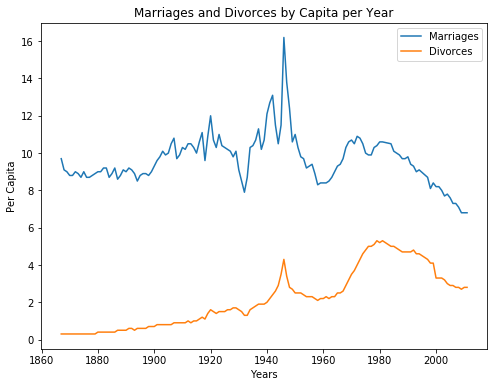

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

data = pd.read_csv('us-marriages-divorces-1867-2014.csv').dropna()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data['Year'], data['Marriages_per_1000'], label='Marriages')
ax.plot(data['Year'], data['Divorces_per_1000'], label='Divorces')

ax.set_ylabel('Per Capita')
ax.set_xlabel('Years')
ax.set_title('Marriages and Divorces by Capita per Year')
ax.legend()

plt.ticklabel_format(axis="y", style="plain")
plt.show()

## Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

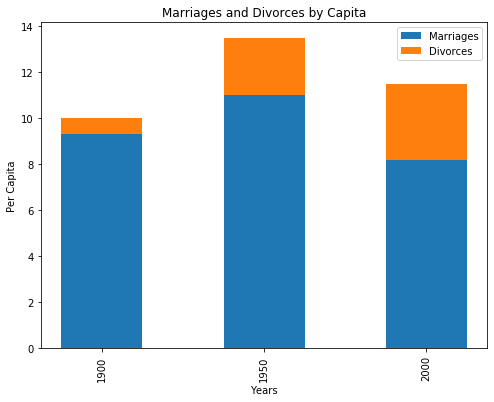

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from matplotlib.dates import date2num
import datetime

years = [1900,1950,2000]
data = pd.read_csv('us-marriages-divorces-1867-2014.csv').dropna()
data = data[data.Year.isin(years)]
data = data.set_index('Year')

data =  data.loc[:,['Marriages_per_1000','Divorces_per_1000']]
data.rename(columns = {'Marriages_per_1000': 'Marriages', 'Divorces_per_1000': 'Divorces'}, inplace=True)
ax = data.plot.bar(stacked=True,figsize=(8, 6))

ax.set_ylabel('Per Capita')
ax.set_xlabel('Years')
ax.set_title('Marriages and Divorces by Capita')
ax.legend()
ax.autoscale()

plt.show()

## Question 8 
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

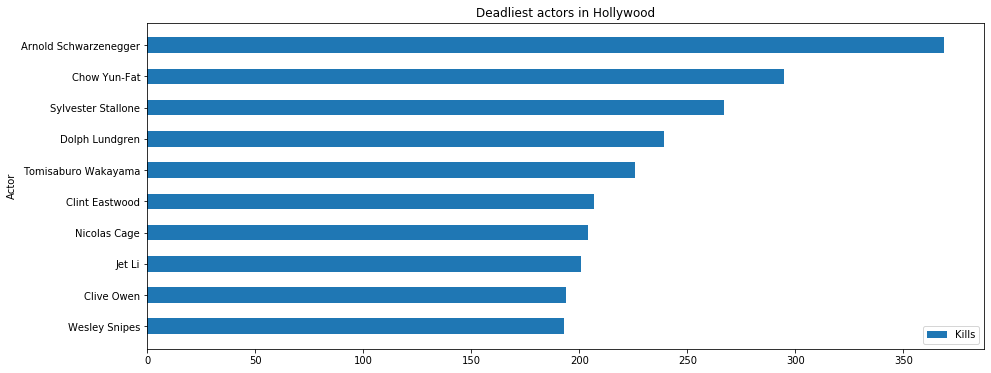

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from matplotlib.dates import date2num
import datetime

data = pd.read_csv('actor_kill_counts.csv')
data = data.sort_values(['Count'], ascending=True)

data.rename(columns = {'Actor': 'Actor', 'Count': 'Kills'}, inplace=True)
ax = data.plot.barh(x='Actor', y='Kills', figsize=(15, 6))

ax.set_title('Deadliest actors in Hollywood')
ax.legend()
ax.autoscale()

plt.show()

## Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

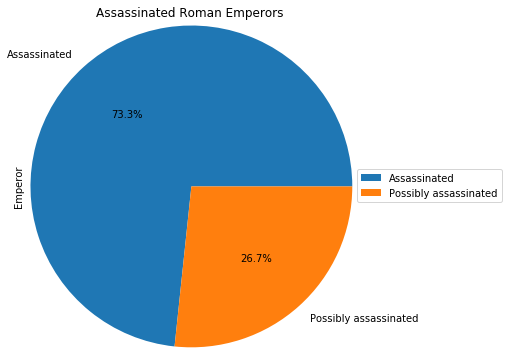

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from matplotlib.dates import date2num
import datetime

data = pd.read_csv('roman-emperor-reigns.csv')
data = data[data['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

causeOfDeath = data.groupby('Cause_of_Death').count()['Emperor']
causeOfDeath = causeOfDeath.div(causeOfDeath.sum())*100

ax = causeOfDeath.plot.pie(
    autopct=lambda x: "{:.1f}%".format(x), figsize=(10, 6))

ax.set_title('Assassinated Roman Emperors')
ax.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.autoscale(tight=True)

plt.show()

## Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

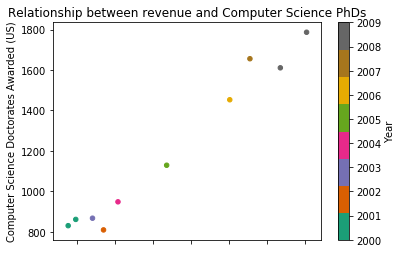

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from matplotlib.dates import date2num
import datetime

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

ax = data.plot.scatter(
    x='Total Arcade Revenue (billions)',
    y='Computer Science Doctorates Awarded (US)',
    c='Year',
    colormap='Dark2')

ax.set_title('Relationship between revenue and Computer Science PhDs')
ax.set(xlabel="Total Arcade Revenue (billions)")
plt.show()